# MNIST Digit Classification using a Fully Connected Neural Network

This notebook implements an end-to-end supervised learning pipeline for handwritten digit classification using the MNIST dataset and a fully connected (Dense) neural network built with TensorFlow/Keras.

The objective is to:
- load and preprocess the MNIST dataset
- build a simple neural network (without CNNs)
- train the model
- evaluate its performance on unseen test data
- analyze model errors using a confusion matrix


## 1. Import required libraries

We import TensorFlow/Keras for model building and training, NumPy for numerical operations, and Matplotlib/Seaborn for visualization.


In [4]:
# Core deep learning framework
import tensorflow as tf

# Keras utilities for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Dataset loader
from tensorflow.keras.datasets import mnist

# Numerical operations
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Load the MNIST dataset

The MNIST dataset consists of:
- 60,000 training images
- 10,000 test images

Each image is grayscale with shape (28 × 28), and labels are digits from 0 to 9.


In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## 3. Data preprocessing

Neural networks perform better when input features are normalized.
Pixel values originally lie in the range [0, 255], so we scale them to [0, 1].

Note:
- Only input features are normalized
- Labels remain unchanged (integers 0–9)


In [7]:
# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

## 4. Build the neural network model

Architecture:
- Flatten layer to convert 28×28 images into 784-dimensional vectors
- Three hidden Dense layer with ReLU activation
- Output layer with Softmax activation for multi-class classification


In [8]:
# Define a Sequential neural network
model = Sequential([
    # Converts each 28x28 image into a 1D vector of length 784
    Flatten(input_shape = (28, 28)),

    # Three hidden layer with ReLU activation
    Dense(units = 784, activation = 'relu'),
    Dense(units = 256, activation = 'relu'),
    Dense(units = 128, activation = 'relu'),

    # Output layer with Softmax for 10-class classification
    Dense(units = 10, activation = 'softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## 5. Compile the model

We configure:
- Adam optimizer for efficient gradient-based optimization
- Sparse categorical crossentropy since labels are integer-encoded
- Accuracy as the evaluation metric


In [9]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

## 6. Train the model

The model is trained for a fixed number of epochs.
Batch size controls how many samples are processed before each weight update.


In [10]:
history = model.fit(X_train, y_train, epochs = 7, batch_size = 32)

Epoch 1/7


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9006 - loss: 0.3209
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9739 - loss: 0.0872
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9818 - loss: 0.0570
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9854 - loss: 0.0471
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9889 - loss: 0.0365
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9911 - loss: 0.0302
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9928 - loss: 0.0234


## 7. Evaluate model performance

Evaluation is performed on the test dataset, which the model has never seen during training.
This provides an unbiased estimate of generalization performance.


In [11]:
print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

0.0 1.0
0.0 1.0


In [12]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_accuracy}, Test loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9748 - loss: 0.1146

Test accuracy: 0.9776999950408936, Test loss: 0.0990704596042633


## 8. Generate predictions

The model outputs probability distributions over the 10 digit classes.
We convert these probabilities into predicted class labels.


In [13]:
# Predict class probabilities for the test set
predictions = model.predict(X_test)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [14]:
print("Predicted:", predicted_labels[:10])
print("Actual:", y_test[:10])

Predicted: [7 2 1 0 4 1 4 9 6 9]
Actual: [7 2 1 0 4 1 4 9 5 9]


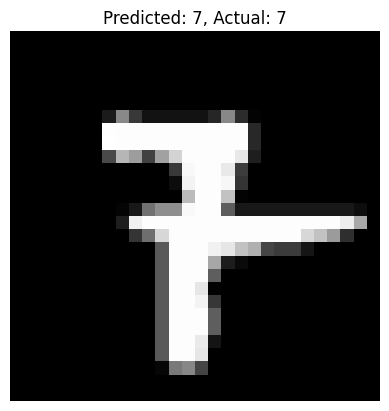

In [15]:
i = 97
plt.imshow(X_test[i], cmap = "gray")
plt.title(f"Predicted: {predicted_labels[i]}, Actual: {y_test[i]}")
plt.axis("off")
plt.show()

## 9. Confusion matrix

The confusion matrix shows how often each digit is correctly classified
and which digits are commonly confused with each other.


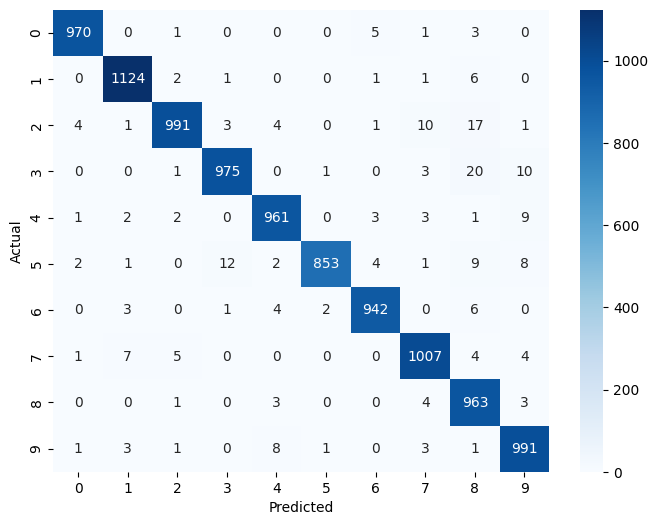

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Visualize confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()